In [2]:
import cv2
from matplotlib import pyplot
import numpy as np

# Ustawienie rozmarów wyświetlanych obrazów
pyplot.rcParams["figure.figsize"] = (18, 10)

In [3]:
#
# Wczytanie obrazów źródłowych
#
# źródło grafiki colors.jpg: https://unsplash.com/photos/gT5kuls6Y6Q
# źródło grafiki gacław-na-kuchni.jpg: własne
#
#image_from_file = cv2.imread('images/colors.jpg')
image_from_file = cv2.imread('images/gacław-na-kuchni.jpg')
image_gray = cv2.cvtColor(image_from_file, cv2.COLOR_BGR2GRAY)
image_color = cv2.cvtColor(image_from_file, cv2.COLOR_BGR2RGB)
print('Rozmiar obrazka: ', image_from_file.shape)

Rozmiar obrazka:  (768, 1024, 3)


# Zadanie 1

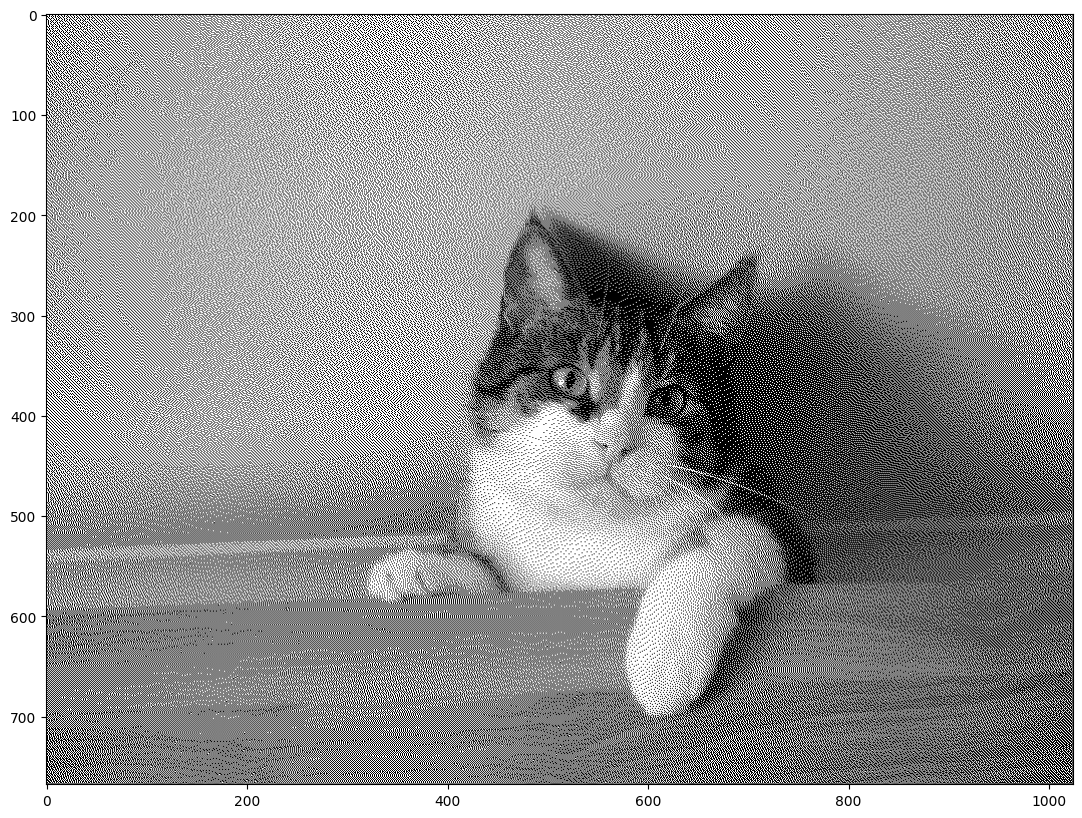

In [4]:

def find_closest_palete_color(value):
    return round(value / 255) * 255


output = np.copy(image_gray)
output = output.astype(dtype=int)

#
# Algorytm
#
for y in range(output.shape[0] - 1):
    for x in range(1, output.shape[1] - 1):
        oldpixel = output[y][x]
        newpixel = find_closest_palete_color(oldpixel)
        output[y][x] = newpixel

        quant_error = oldpixel - newpixel

        output[y][x+1] +=  (quant_error * 7 / 16)
        output[y+1][x-1] += (quant_error * 3 / 16)
        output[y+1][x] += (quant_error * 5 / 16)
        output[y+1][x+1] + (quant_error * 1 / 16)
np.clip(output,0,255)
output = output.astype(dtype=np.uint8)
#
# Wyświetlenie
#
pyplot.imshow(output, cmap='gray')

Text(0, 0.5, 'Liczba pikseli obrazu []')

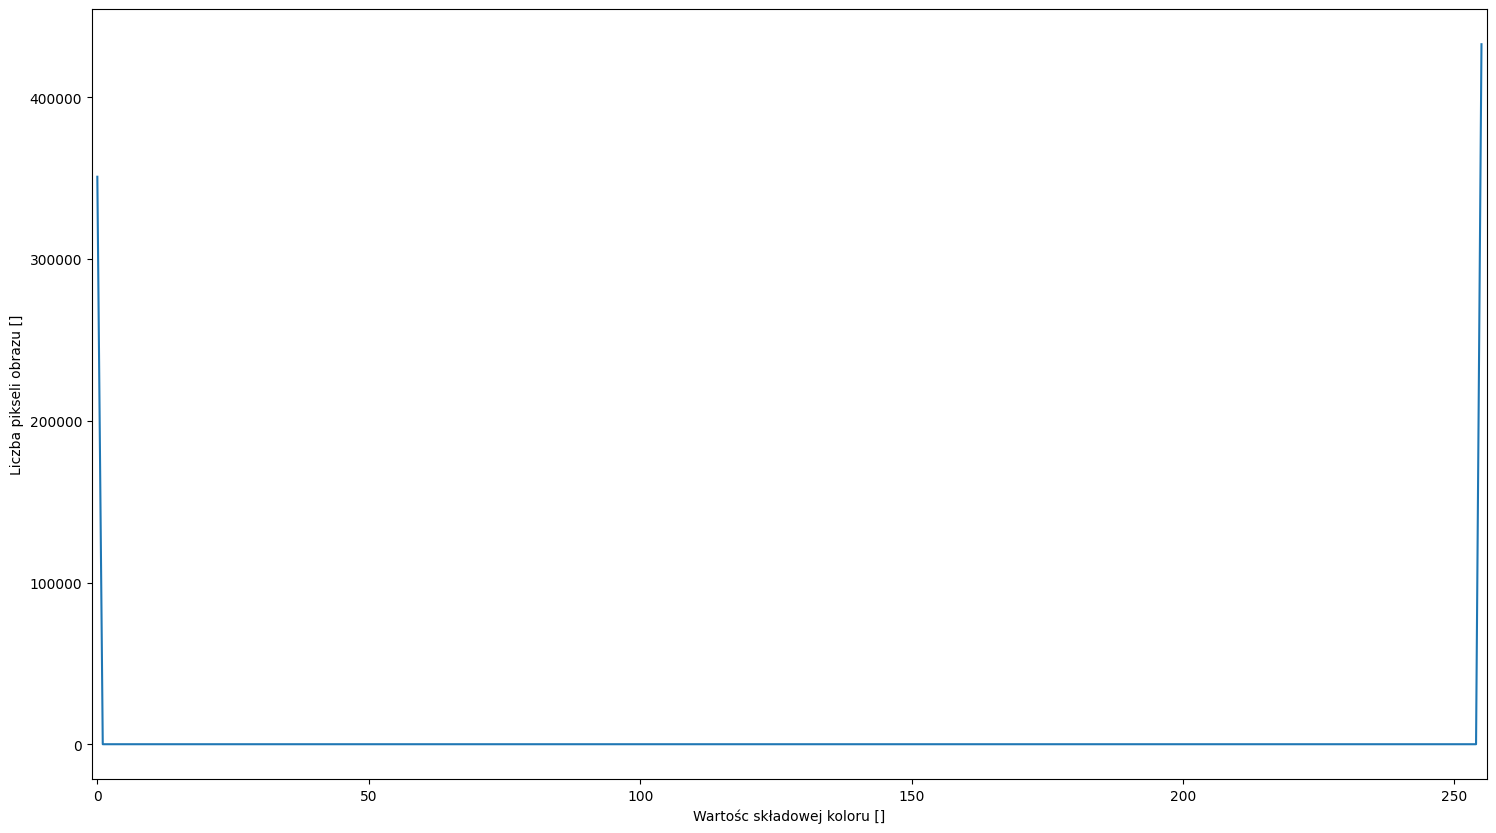

In [5]:
#
# Histogram
#
histr = cv2.calcHist([output], [0], None, [256], [0, 256])
pyplot.plot(histr)
pyplot.xlim([-1, 256])
pyplot.xlabel('Wartośc składowej koloru []')
pyplot.ylabel('Liczba pikseli obrazu []')

# Zadanie 2

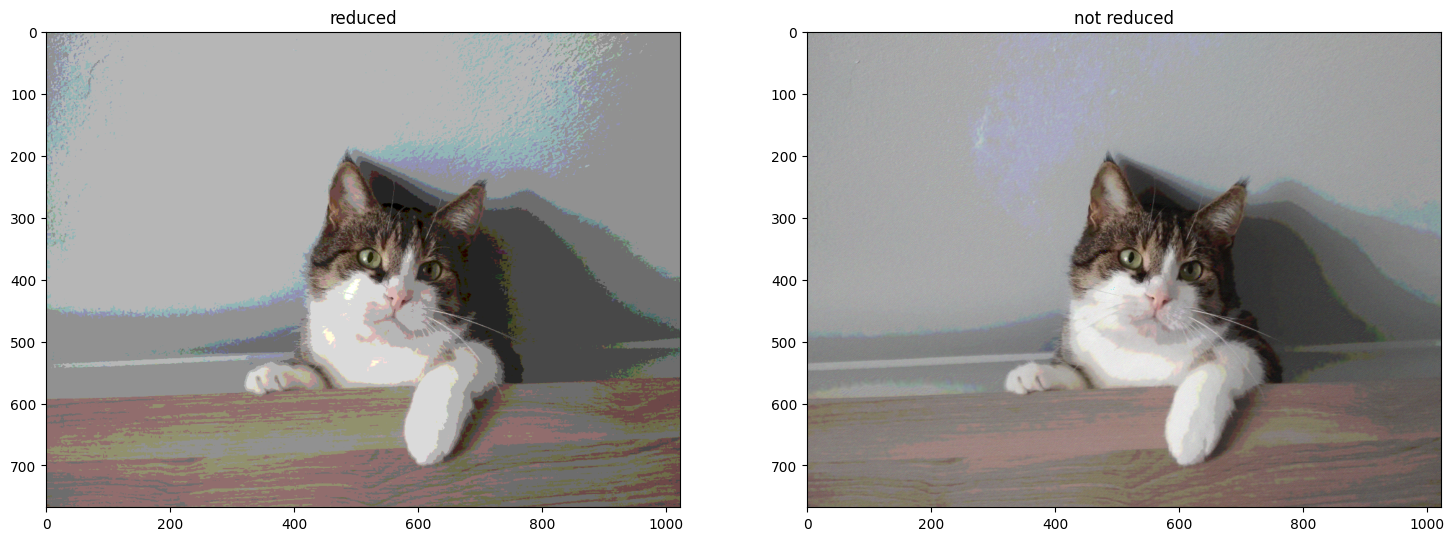

In [6]:
output = np.copy(image_color)
output = output.astype(dtype=int)

reduced = np.copy(image_color)


def find_closest_palete_color(value, k = 2):
    return round((k - 1) * value / 255) * 255 / (k - 1)


bit_value = 8
#
# Algorytm
#
for y in range(output.shape[0] - 1):
    for x in range(1, output.shape[1] - 1):
        oldpixel = [output[y][x][0],
                    output[y][x][1],
                    output[y][x][2]]
        newpixel = [find_closest_palete_color(oldpixel[0], bit_value),
                    find_closest_palete_color(oldpixel[1], bit_value),
                    find_closest_palete_color(oldpixel[2], bit_value)]
        reduced[y][x] = [find_closest_palete_color(reduced[y][x][0], bit_value),
                         find_closest_palete_color(reduced[y][x][1], bit_value),
                         find_closest_palete_color(reduced[y][x][2], bit_value)]
        for channel in range(3):
            quant_error = oldpixel[channel] - newpixel[channel]
            output[y][x+1][channel] +=  (quant_error * 7 / 16)
            output[y+1][x-1][channel] += (quant_error * 3 / 16)
            output[y+1][x][channel] += (quant_error * 5 / 16)
            output[y+1][x+1][channel] + (quant_error * 1 / 16)
np.clip(output,0,255)
output = output.astype(dtype=np.uint8)

#
# Wyświetlenie
#
fig, ax = pyplot.subplots(1, 2)
ax[0].set_title("reduced")
ax[0].imshow(reduced)
ax[1].set_title("not reduced")
ax[1].imshow(output)

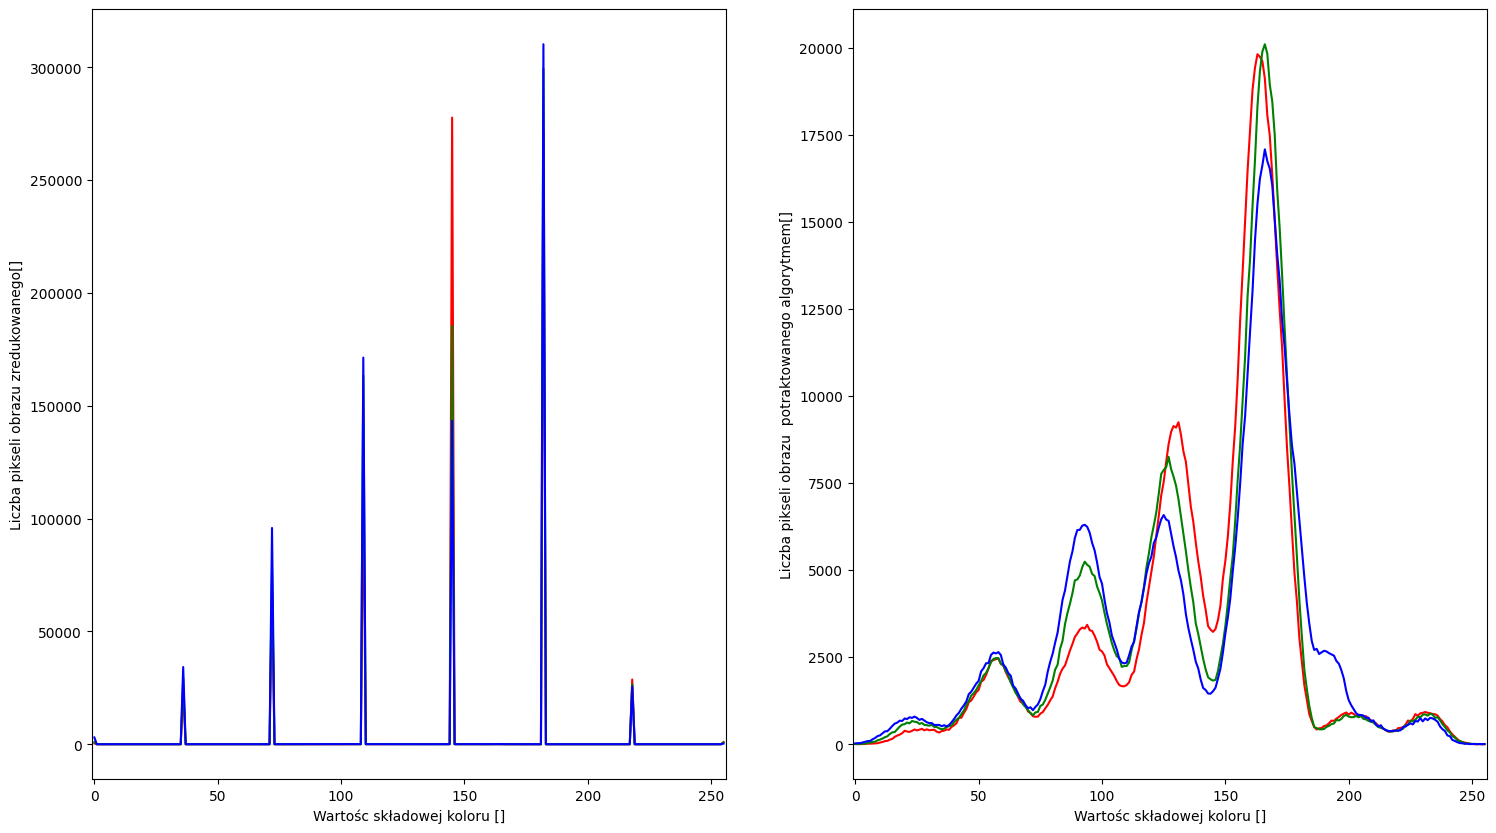

In [7]:
#
# Histogram
#
color = ('r', 'g', 'b')
fig, ax = pyplot.subplots(1, 2)

for i, col in enumerate(color):
    histr1 = cv2.calcHist([reduced], [i], None, [256], [0, 256])
    histr2 = cv2.calcHist([output], [i], None, [256], [0, 256])
    ax[0].plot(histr1, color=col)
    ax[0].set_xlim([-1, 256])
    ax[0].set_xlabel('Wartośc składowej koloru []')
    ax[0].set_ylabel('Liczba pikseli obrazu zredukowanego[]')
    ax[1].plot(histr2, color=col)
    ax[1].set_xlim([-1, 256])
    ax[1].set_xlabel('Wartośc składowej koloru []')
    ax[1].set_ylabel('Liczba pikseli obrazu  potraktowanego algorytmem[]')

# Zadanie 3

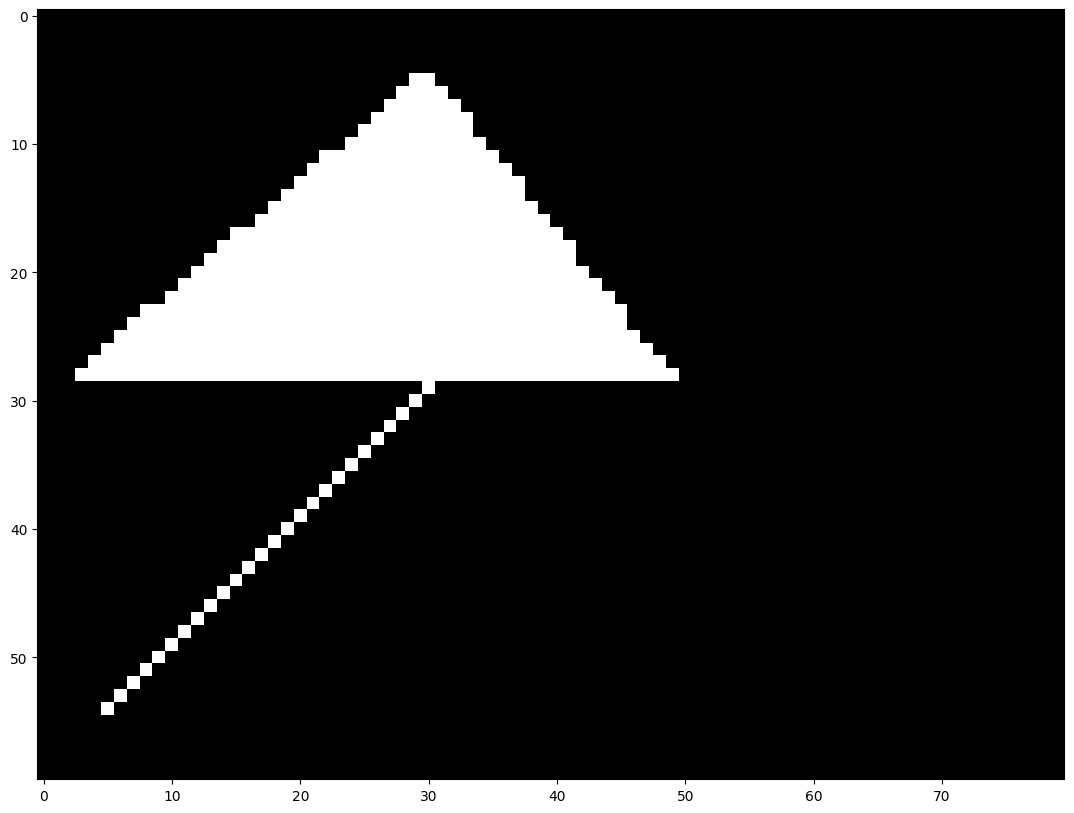

In [31]:
#
# Przygotowanie płótna
#
width = 80
height = 60
image = np.zeros((height, width, 3), dtype=np.uint8)


#
# Funkcja rysująca punkt
#
# NOTE(sdatko): punkt 0,0 to lewy dolny róg obrazu
#
def draw_point(image, x, y, color=(255, 255, 255)):
    image[image.shape[0] - 1 - y, x, :] = color


#
# Funkcja rysująca linię
#
def draw_line(image, x1, y1, x2, y2):
    #Difference
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    #Direction
    sx = 1 if x1 < x2 else -1
    sy = 1 if y1 < y2 else -1
    err = dx - dy

    while x1 != x2 or y1 != y2:
        draw_point(image, x1, y1)
        e2 = err * 2
        if e2 > -dy:
            err -= dy
            x1 += sx
        if e2 < dx:
            err += dx
            y1 += sy
    draw_point(image, x2, y2)

#
# Funkcja rysująca trójkąt
#


class vertex:
    def __init__(self, x, y):
        self.x = x
        self.y = y


def draw_triangle(image, a, b, c):
    min_x = min(a.x, b.x, c.x)
    max_x = max(a.x, b.x, c.x)
    min_y = min(a.y, b.y, c.y)
    max_y = max(a.y, b.y, c.y)
    for y in range(min_y, max_y + 1):
        for x in range(min_x, max_x + 1):
            ar1 = (x - a.x)*(b.y - a.y) - (y - a.y)*(b.x - a.x)
            ar2 = (x - b.x)*(c.y - b.y) - (y - b.y)*(c.x - b.x)
            ar3 = (x - c.x)*(a.y - c.y) - (y - c.y)*(a.x - c.x)
            if np.sign(ar1) == np.sign(ar2) == np.sign(ar3):
                draw_point(image, x, y)

#
# Rysowanie
#
draw_line(image, 5, 5, 30, 30)

draw_triangle(image, vertex(1,30), vertex(50,30), vertex(30,55))

#
# Wyświetlenie
#
pyplot.imshow(image)

# Zadanie 4

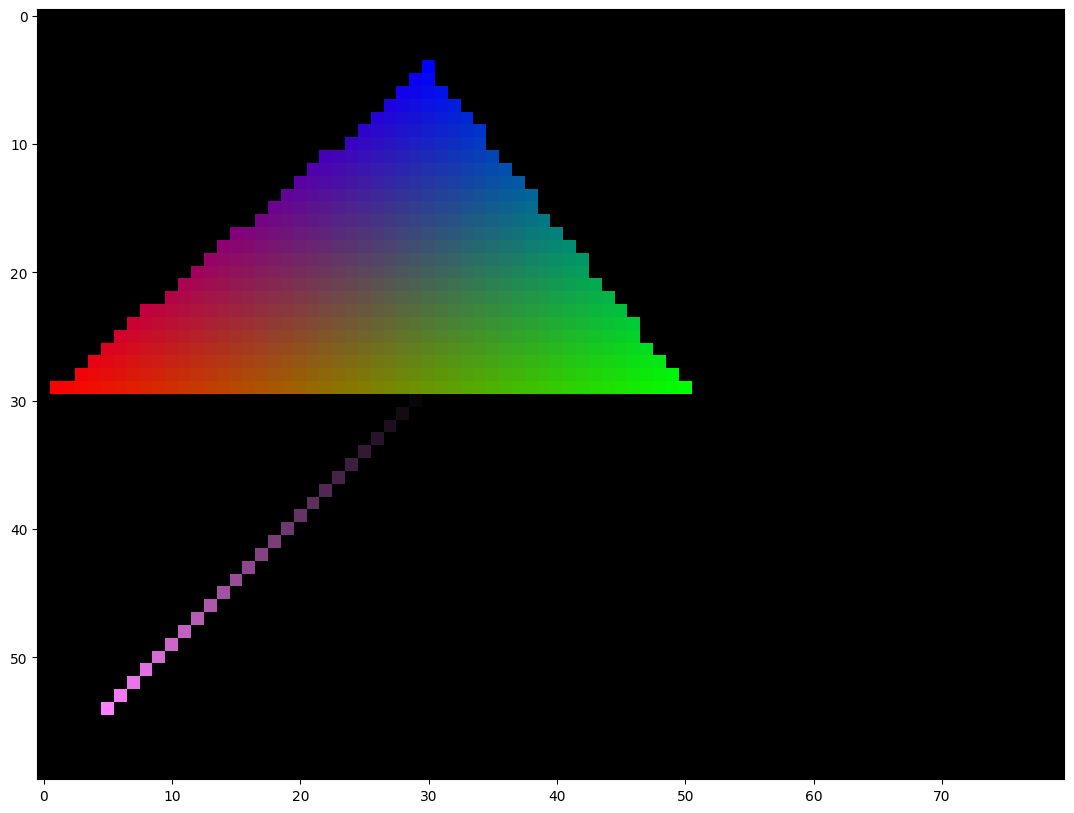

In [40]:
#
# Przygotowanie płótna
#
width = 80
height = 60
image = np.zeros((height, width, 3), dtype=np.uint8)


#
# Funkcja rysująca punkt
#
# NOTE(sdatko): punkt 0,0 to lewy dolny róg obrazu
#
def draw_point(image, x, y, color=(255, 255, 255)):
    image[image.shape[0] - 1 - y, x, :] = color


def interpolate_color(color1, color2, ratio):
    r = int(color1[0] + ratio * (color2[0] - color1[0]))
    g = int(color1[1] + ratio * (color2[1] - color1[1]))
    b = int(color1[2] + ratio * (color2[2] - color1[2]))
    return (r, g, b)



# Funkcja rysująca linię
#
def draw_line(image, x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    length = max(abs(dx), abs(dy))
    if length == 0:
        draw_point(image, x1, y1, color=interpolate_color((255, 128, 0), (0, 0, 0), 0.5))
    else:
        dx /= length
        dy /= length
        for i in range(length + 1):
            x = int(x1 + i * dx)
            y = int(y1 + i * dy)
            t = i / length
            color = interpolate_color((255, 128, 255), (0, 0, 0), t)
            draw_point(image, x, y, color=color)

#
# Funkcja rysująca trójkąt
#


class vertex:
    def __init__(self, x, y):
        self.x = x
        self.y = y


def draw_triangle(image, a, b, c, color1=(255, 0, 0), color2=(0, 255, 0), color3=(0, 0, 255)):
    min_x = min(a.x, b.x, c.x)
    max_x = max(a.x, b.x, c.x)
    min_y = min(a.y, b.y, c.y)
    max_y = max(a.y, b.y, c.y)
    
    lambda_total = abs((b.x - a.x) * (c.y - a.y) - (b.y - a.y) * (c.x - a.x))
    
    for y in range(min_y, max_y + 1):
        for x in range(min_x, max_x + 1):
            lambda0 = abs((b.x - x) * (c.y - y) - (b.y - y) * (c.x - x))
            lambda1 = abs((c.x - x) * (a.y - y) - (c.y - y) * (a.x - x))
            lambda2 = abs((a.x - x) * (b.y - y) - (a.y - y) * (b.x - x))
            lambda_sum = lambda0 + lambda1 + lambda2
            
            if lambda_sum == lambda_total:
                lambda0 /= lambda_total
                lambda1 /= lambda_total
                lambda2 /= lambda_total
                
                interpolated_color = (
                    int(lambda0 * color1[0] + lambda1 * color2[0] + lambda2 * color3[0]),
                    int(lambda0 * color1[1] + lambda1 * color2[1] + lambda2 * color3[1]),
                    int(lambda0 * color1[2] + lambda1 * color2[2] + lambda2 * color3[2])
                )
                
                draw_point(image, x, y, color=interpolated_color)
#
draw_line(image, 5, 5, 30, 30)

draw_triangle(image, vertex(1,30), vertex(50,30), vertex(30,55))

#
# Wyświetlenie
#
pyplot.imshow(image)

# Zadanie 5

In [30]:
#
# Przygotowanie płótna
#
width = 80 * 2
height = 60 * 2
image = np.zeros((height, width, 3), dtype=np.uint8)


#
# Funkcja rysująca punkt
#
# NOTE(sdatko): punkt 0,0 to lewy dolny róg obrazu
#
def draw_point(image, x, y, color=(255, 255, 255)):
    image[image.shape[0] - 1 - y, x, :] = color


#
# Funkcja rysująca linię
#
def draw_line(image, x1, y1, x2, y2):
    pass  # TODO: implement


#
# Funkcja rysująca trójkąt
#
def draw_triangle(image, a, b, c):
    pass  # TODO: implement


#
# Rysowanie
#
pass  # TODO: implement

#
# Wyświetlenie
#
pyplot.imshow(image)

NameError: name 'numpy' is not defined